# K - Nearest Neighbor (KNN)

## **What is K-Nearest Neighbors (KNN)?**
K-Nearest Neighbors (KNN) is a simple, intuitive, and versatile supervised learning algorithm used for both classification and regression tasks. It works by finding the most similar data points (neighbors) to a new instance and making predictions based on the labels or values of those neighbors.

## **How KNN Works:**

1. Data Storage: KNN does not explicitly train a model; instead, it stores the entire training dataset.
2. Distance Calculation: When a new instance (test point) is given, the algorithm calculates the distance between the test point and all points in the training set. Common distance metrics include:
    * Euclidean Distance (most commonly used)\
    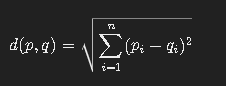
    * Manhattan distance, 
    * Minkowski distance, etc.
3. Finding Neighbors: The algorithm then selects the K closest data points (neighbors) to the test point based on the calculated distances.
4. Voting/Prediction:
    * For classification: The algorithm assigns the test point to the class that is most frequent among its K neighbors (majority voting).
    * For regression: The algorithm takes the average (or weighted average) of the values of the K nearest neighbors to predict a continuous value.

## **KNN for Classification and Regression**
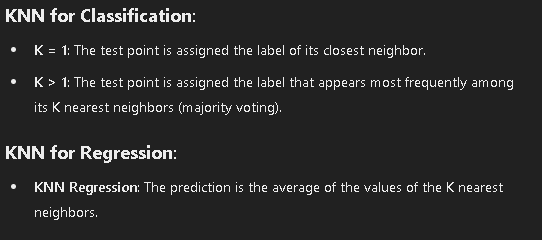

## **Key Features of KNN:**

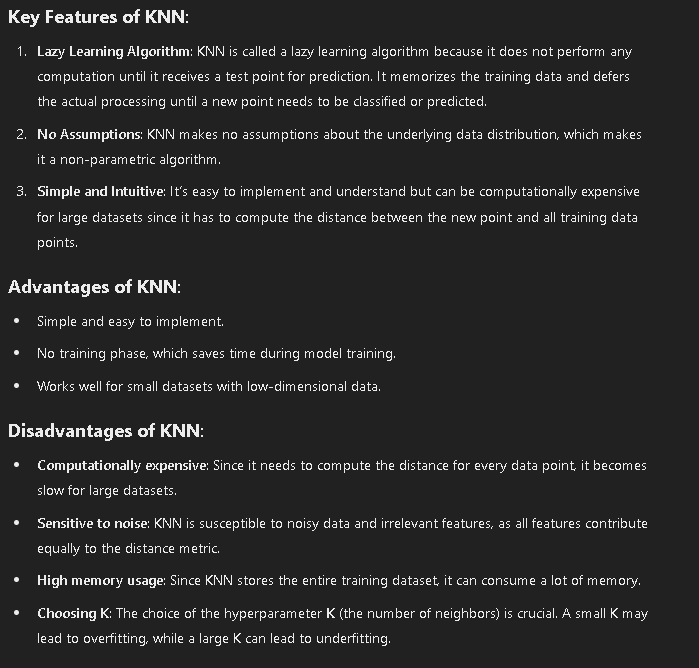

## **Choosing the right K:**

`Cross-validation` is often used to find the best value of K for the given dataset. You can try different values of K and use cross-validation to select the one that results in the best performance.

## Classification using KNN

In [20]:
# Import the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
# Load the Dataset
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
# split the data into X and y
X = df.drop('species', axis=1)
y = df['species']

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(50.722222222222214, 0.5, 'True')

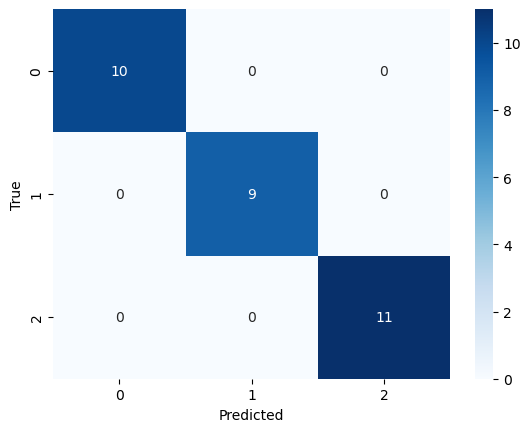

In [14]:
# train test split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = KNeighborsClassifier(n_neighbors=11)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

## Regression using KNN

In [40]:
# load the dataset
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [41]:
# split the data into X and y
X = tips[['total_bill', 'size']]
y = tips['tip']

In [42]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

model = KNeighborsRegressor(n_neighbors=6, metric='minkowski', p=2)

# fit the model on the training data
model.fit(X_train, y_train)

# predict the species for the test data
y_pred = model.predict(X_test)

# evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")

Mean Squared Error: 0.7100431972789115
R2 Score: 0.43195242037812764
RMSE: 0.8426406097969119


In [48]:
# predict a specific value
model.predict([[6, 2]])

c:\Users\PS144\miniconda3\envs\timeseries_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([1.98333333])